In [1]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_long_from_analysis,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave,plot_single_plate
import matplotlib.patches as mpatches
import statsmodels.api as sm
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.io as sio
import matplotlib as mpl
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.legend_handler import HandlerTuple
from amftrack.util.plot import gridplot
import logging
logging.getLogger().setLevel(logging.WARNING)
plt.style.use('presentation.mplstyle')

%matplotlib widget

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
all_analysis_folders = get_analysis_folders()
plates = [
    # '1014_20220525', 
       #    '1023_20220502',
       #    '1042_20220523',
       # '1045_20220504',
       #    '1048_20220506',
       #    '1053_20220413',
       # '127_20220705',
       #    '130_20220707',
          '30_20220509',
       '32_20220428',
          '33_20220502',
          # '800_20210928'
         ]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,use_saved=False)
folders,time_plate_info_long = get_time_plate_info_long_from_analysis(analysis_folders,use_saved=False)
time_plate_info = time_plate_info.replace(-1.0,np.nan)
time_plate_info_long = time_plate_info_long.replace(-1.0,np.nan)
width = 1.6
height = 1
# folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders,use_saved=False)
# folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders,use_saved=False)

In [3]:
path_figure = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\HFSP_symbiotic-networks\Article_TravellingWave\FigureS2"

In [4]:
Css = {}
lambss = {}
dss = {}
meancurves = {}
meancurves2 = {}
t0ss = {}
timestep = {32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 50,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:150,152:35,792:60,1048:60,1045:50,941:50}
timestep2 = {102:25,83:70,76:20,81:70,32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 75,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:50,1048:60,1045:50}
timestep = {**timestep, **timestep2}
timestep2 = {1014 : 80,1024:25,1027:18,1028:60,1030 : 60,1032 : 50,1042 : 120,1048:70,127:120,129:60,130:50,991:40}
timestep = {**timestep, **timestep2}
timestep2 = {1023 : 60,1031:30,1035:30,1037 : 80,1039 : 90,1045:70,1047:50,1053:40}
timestep = {**timestep, **timestep2}    

timestep2 = {1071 : 25,1076:70,839:60,938 : 35}
timestep = {**timestep, **timestep2}
timestep2 = {30 : 62,32 : 160,33:80}
timestep = {**timestep, **timestep2}
timestep2 = {799 : 100,800 : 25,91:100,99:40}
timestep = {**timestep, **timestep2}
timestep2 = {59 : 30,69 : 30}
timestep = {**timestep, **timestep2}

In [5]:
shifts = {int(plate.split('_')[0]) : 0 for plate in plates}
shifts = {30: 20, 32: 30, 33: 20}
shifts

{30: 20, 32: 30, 33: 20}

c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\final_analysis\density_wave.py:46: RuntimeWarning: overflow encountered in square
  np.exp(lamb * (x0 + x - c * t)) / (1 + np.exp(lamb * (x0 + x - c * t))) ** 2
c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\final_analysis\density_wave.py:46: RuntimeWarning: overflow encountered in exp
  np.exp(lamb * (x0 + x - c * t)) / (1 + np.exp(lamb * (x0 + x - c * t))) ** 2
c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\final_analysis\density_wave.py:46: RuntimeWarning: invalid value encountered in divide
  np.exp(lamb * (x0 + x - c * t)) / (1 + np.exp(lamb * (x0 + x - c * t))) ** 2


2023-05-09 15:40:02,632-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


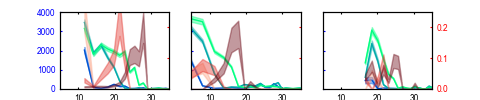

In [6]:
cmap2 = mpl.cm.get_cmap("spring")
cmap = mpl.cm.get_cmap("winter")
# plates = [
#     "52_20220707",
#     "56_20220701",
#     "59_20201126",
#     "69_20201119",
#     # "76_20210108",
#     "81_20220704",
#     "84_20220621",
#     "94_20201123",
#     "102_20201226",
#     "152_20201224",
#     "792_20210915",
#     "1076_20220511",
#     "941_20220404"
# ]
suffix = ""
suffix = "-new"
max_indexes = {int(plate.split('_')[0]) : 20 for plate in plates}
ncols =3
fig,axs = gridplot(len(plates),ncols = ncols,subh = height,subw = width,sharex=True,sharey=True)
cmap1 = mpl.cm.get_cmap("summer")
cmap2 = mpl.cm.get_cmap("Reds")
for j,ax in enumerate(axs):
    if j<len(plates):
        ax2 = ax.twinx()
        plate = plates[j]
        plate = int(plate.split('_')[0])
        table = time_plate_info.loc[time_plate_info["Plate"]==plate]
        table_err = time_plate_info_long.loc[time_plate_info_long["Plate"]==plate]

        # table = table.dropna()
        ts = list(table['timestep'])
        table = table.set_index('timestep',drop=False)
        table_err = table_err.set_index('timestep',drop=False)

        ts = list(table.index)
        ts.sort()
        dic = {}
        ax.axis([5,35,0,4000])

        timesteps= range(0,timestep[plate]) 

        popt_f,r_squared_dens,popt_f2,r_squared_tips =get_wave_fit(time_plate_info,plate,timesteps,max_indexes,lamb = -1,C =1000)
        t0 = max(0,popt_f[-1]/popt_f[0])
        shift = shifts[plate]
        timesteps = table.loc[table['time_since_begin_h'].between(t0+shift,t0+shift+100)]['timestep']
        indexes = range(0,len(timesteps),len(timesteps)//3) 
        indexes = list(indexes)[:3]
        timesteps = timesteps.iloc[indexes]
        lines = []
        markers = ['o','v','s']
        for i,t in enumerate(timesteps):
     #     ax.set_yscale("log")

            maxL = np.sqrt(1900)
            X = np.linspace(0,maxL,100)
            incr = 100
            def density(x,suffix = ''):
                area = x**2
                index = int(area//incr)
                column = f"ring_density_incr-100_index-{index}{suffix}"
                if len(suffix) == 0:
                    return(float(table[column][t]))
                else:
                    return(float(table_err[column][t]))
            xvalues = np.array([np.sqrt(100*i) for i in range(max_indexes[plate])])
            yvalues = [density(x,suffix) for x in xvalues]
            xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues) if not(np.isnan(y))])

            dic[t] = {}
            dic[t]['distance_origin'] = xvalues
            dic[t]['ring_density'] = yvalues
            xvalues = np.array(xvalues)
            yvalues = np.array(yvalues) 
            X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
            Y = yvalues
            line = {"type" : "data hypha density","x" : np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)),"y" : yvalues,"time_h":table["time_since_begin"][t]/1e6}
            lines.append(line)
            scat1 = ax.plot(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,color=cmap((i+1)/len(timesteps)),label=f't={int(table["time_since_begin"][t]/pd.Timedelta(days=1))} days')
            table = table.sort_values('area_sep_comp')
            xs, ys  = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues
            err = 0*ys + 160*ys/np.max(ys)
            ax.fill_between(xs, ys-err, ys+err,color=cmap((i+1)/len(timesteps)),alpha = 0.4)
            # draw_error_band(ax, xs, ys,err,color=cmap((len(timesteps)-i)/len(timesteps)),alpha = 0.6)
            #     ellipses = [Ellipse((x,ys[j]), 0.5, np.std(ys)*ys[j]/2000, facecolor=cmap((len(timesteps)-i)/len(timesteps)), edgecolor="white") for j,x in enumerate(xs)]

        #     for ellipse in ellipses:
        #         ax.add_artist(ellipse)
            xs = np.linspace(np.min(X),np.max(X),1000)
            ts = [table['time_since_begin_h'][t] for x in xs]
            xt = np.array((xs,ts))
            line = {"type" : "fit hypha density","x" : xs,"y" : wave(xt,*popt_f),"time_h":table["time_since_begin"][t]/pd.Timedelta(days=1)}
            lines.append(line)
            # ax.plot(xs,wave(xt,*popt_f),color=cmap((len(timesteps)-i)/len(timesteps)))
            def density(x):
                area = x**2
                index = int(area//incr)
                column = f"ring_active_tips_density_incr-100_index-{index}"
                return(float(table[column][t]))
            xvalues = np.array([np.sqrt(100*i) for i in range(max_indexes[plate])])
            yvalues = [density(x) for x in xvalues]

            xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues) if not(np.isnan(y))])
            dic[t]['tip_density'] = yvalues
            xvalues = np.array(xvalues)
            yvalues = np.array(yvalues) 
            X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
            Y = yvalues
            # scat2 = ax2.plot(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,color=cmap2((i+1)/len(timesteps)))

            line = {"type" : "data tip density","x" : (np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))),"y" : yvalues,"time_h":int(table["time_since_begin"][t]//pd.Timedelta(days=1))}
            lines.append(line)
            xs = np.linspace(np.min(X),np.max(X),1000)
            ts = [table['time_since_begin_h'][t] for x in xs]
            xt = np.array((xs,ts))
            # ax2.plot(xs,dwave(xt,*popt_f2),color=cmap2((len(timesteps)-i)/len(timesteps)))
            xs, ys  = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues
            err = abs(ys)/4

            # err = 0*ys + 80
            ax2.fill_between(xs, ys-err, ys+err,color=cmap2((i+1)/len(timesteps)),alpha = 0.4)
        #     ellipses = [Ellipse((x,ys[j]), 0.5, np.std(ys)*ys[j]/0.10, facecolor=cmap2((len(timesteps)-i)/len(timesteps)), edgecolor="white") for j,x in enumerate(xs)]

        #     for ellipse in ellipses:
        #         ax2.add_artist(ellipse)
            # ax.set_title(plate)
            if j//ncols == len(plates)//ncols-1:
                ax.set_xlabel('Distance from origin (mm)')
            # if j%ncols == 0:
            #     ax.set_ylabel('Network density ($\mu m.mm^{-2}$)') 
            ax2.set_ylim((0,0.25))
            # if j%ncols == ncols-1:
            #     ax2.set_ylabel('Active tip density ($mm^{-2}$)')
            if j%ncols < ncols-1:
                ax2.set_yticklabels([])
            ax.tick_params(axis='y', colors='blue')
            ax2.tick_params(axis='y', colors='red')
            right = 0.90
            top = 0.90
            fontsize = 10

# plt.tight_layout()
# fig.text(0.5, 0.0, 'Distance from origin (mm)', ha='center', va='center',size = 20)
# fig.text(0.04, 0.5, 'Network density ($\mu m.mm^{-2}$)', ha='center', va='center', rotation='vertical',size = 20)
# plt.tight_layout()


plt.savefig(os.path.join(path_figure,'FigureS2B_agg.pdf'), transparent=True, bbox_inches='tight')

In [7]:
suffix = "-new"
# suffix = ""



c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\final_analysis\density_wave.py:46: RuntimeWarning: overflow encountered in square
  np.exp(lamb * (x0 + x - c * t)) / (1 + np.exp(lamb * (x0 + x - c * t))) ** 2
c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\final_analysis\density_wave.py:46: RuntimeWarning: overflow encountered in exp
  np.exp(lamb * (x0 + x - c * t)) / (1 + np.exp(lamb * (x0 + x - c * t))) ** 2
c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\final_analysis\density_wave.py:46: RuntimeWarning: invalid value encountered in divide
  np.exp(lamb * (x0 + x - c * t)) / (1 + np.exp(lamb * (x0 + x - c * t))) ** 2
C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\final_analysis\density_wave.py:55: RuntimeWarning: overflow encountered in exp
  return

2023-05-09 15:42:04,244-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


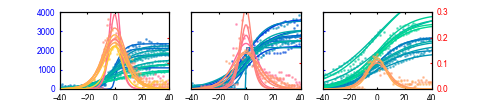

In [9]:
cmap1 = mpl.cm.get_cmap("spring")
cmap2 = mpl.cm.get_cmap("winter")
maxi = 15
max_area=50
Csstips = {}
Css = {}

ncols =3
lambsstips = {}
fig,axs = gridplot(len(plates),ncols = ncols,subh = height,subw = width,sharex=True,sharey=True)
dss = {}
dssC = {}

for j,ax in enumerate(axs):
    if j<len(plates):
    # if j==2:
        
        ax2 = ax.twinx()
        plate = plates[j]
        plate = int(plate.split('_')[0])
        timesteps= range(0,timestep[plate]) 
        popt_f,r_squared_dens,popt_f2,r_squared_tips =get_wave_fit(time_plate_info,plate,timesteps,max_indexes,lamb = -1,C =1000)
        t0 = popt_f[-1]/popt_f[0]
        table = time_plate_info.loc[time_plate_info["Plate"] == plate].copy()
        table_err = time_plate_info_long.loc[time_plate_info_long["Plate"]==plate]
        table = table.set_index('timestep',drop=False)
        table_err = table_err.set_index('timestep',drop=False)
        shift = shifts[plate]
        timesteps = table.loc[table['time_since_begin_h'].between(t0+shift,t0+shift+110)]['timestep']
        timestep_max =np.max(timesteps)
        # table = table.loc[table["timestep"]<=timestep_max]
        ts = []
        ys = []
        ys2 = []
        Cs = []
        Cserror = []
        t0serror = []
        lambs = []
        indexes = []
        t0s = []
        ds = []
        dsC = []
        Cstips = []
        lambstip = []

        for index in range(1, maxi):
            column = f"ring_density_incr-100_index-{index}{suffix}"
            column2 = f"ring_active_tips_density_incr-100_index-{index}"
            if len(suffix)>0:
                table[column] = table_err[column]
            area = np.sqrt(table["area_sep_comp"][0] + 100 * index)

            sorted_column = table.sort_values(by=column,ascending=True)
            # if len(sorted_column.loc[sorted_column[column] >= 400])>2:
            if len(sorted_column.loc[sorted_column[column] >= 400])>3:
                start = sorted_column.loc[sorted_column[column] >= 400]["time_since_begin"].iloc[2]
                select = table.loc[(table["time_since_begin"]/pd.Timedelta(hours=1)).between(start/pd.Timedelta(hours=1)-50,start/pd.Timedelta(hours=1)+50)]
                # select = select.loc[select["timestep"]<=timestep_max]
                
                select = select.loc[((select["time_since_begin"]>=start)&(select[column]>=400)) | (select["time_since_begin"]<start)&(select[column]<=400)].copy()
                select[f"time_since_begin_{index}"] = (
                    select["time_since_begin"] - start
                )/pd.Timedelta(hours = 1)
                selection_fit = select
                xis,yis = selection_fit[f"time_since_begin_{index}"],selection_fit[column]
                try:
                    popt0, pcov = curve_fit(
                        S,
                        xis,
                        yis,
                        bounds=([0, 0, -np.inf], 3 * [np.inf]),
                        p0=[1, 1000, 0],
                    )
                    lamb, C, t0 = list(popt0)
                    select[f"time_since_begin_{index}"] = select[f"time_since_begin_{index}"] - t0

                    ax.scatter(
                        select[f"time_since_begin_{index}"],
                        select[column],
                        alpha=0.5,
                        color=cmap2(area / max_area),
                    )

                    xis,yis = selection_fit[f"time_since_begin_{index}"],selection_fit[column]
                    data = np.array((xis,yis))
                    def statistic(x,y):
                        try:
                            popt0, pcov = curve_fit(
                            S,
                            x,
                            y,
                            bounds=([0, 0, -np.inf], 3 * [np.inf]),
                            p0=[1, 1, 0],
                        )
                            return(popt0[2])
                        except:
                            return(C)
                    xis,yis = selection_fit[f"time_since_begin_{index}"],selection_fit[column]
                    data = np.array((xis,yis))
                    t0s.append(t0+start/pd.Timedelta(hours=1))

                    Cs.append(C)
                    dsC.append(int(area / np.sqrt((np.pi / 2))))

                    lambs.append(lamb)
                    indexes.append(index)
                    x = np.linspace(-50, 50, 100)
                    ax.plot(
                        x,
                        S(x + t0, lamb, C, t0),
                        color=cmap2(area / max_area),
                        label=f"d = {int(area / np.sqrt((np.pi / 2)))}mm",
                    )
                except (RuntimeError, ValueError) as e:
                    pass
                try:
                    popt1, _ = curve_fit(
                        dS,
                        selection_fit[f"time_since_begin_{index}"],
                        selection_fit[column2],
                        bounds=([0, 0, -np.inf], 3 * [np.inf]),
                        p0=[0.2, 0.5, 0],
                    )
                    lamb, C, t1 = list(popt1)
                    if lamb>0.15:
                        Cstips.append(C)
                        lambstip.append(lamb)
                        ds.append(int(area / np.sqrt((np.pi / 2))))

                        ax2.scatter(
                            select[f"time_since_begin_{index}"]-t1,
                            select[column2],
                            alpha=0.5,
                            color=cmap1(area / max_area),
                        )
                        ax2.plot(
                            x,
                            dS(x +t1, lamb, C, t1),
                            color=cmap1(area / max_area),
                            label=f"d = {int(area / np.sqrt((np.pi / 2)))}mm",
                        )
                except (RuntimeError, ValueError) as e:
                    pass

        ax2.set_xlim((-40, 40))
        ax2.set_ylim((0, 0.30))
        ax.set_ylim((0, 4000))

        # ax.set_ylabel("Network density ($\mu m.mm^{-2}$)")
        # ax2.set_xlabel("Shifted time ($h$)")
        # ax2.set_ylabel("Active tips density ($mm^{-2}$)")
        ax.tick_params(axis="y", colors="blue")
        ax2.tick_params(axis="y", colors="red")
        if j%ncols < ncols-1:
            ax2.set_yticklabels([])
        Csstips[plate] = Cstips
        Css[plate] = Cs

        lambsstips[plate] = lambstip
        dss[plate] = ds
        dssC[plate] = dsC
    # break
    
# plt.tight_layout()

plt.savefig(os.path.join(path_figure,'FigureS2C_agg.pdf'), transparent=True, bbox_inches='tight')


In [10]:
folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders)
folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders)

C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\32_20220428\Analysis_32_20220428_200_Version1\time_hypha_info\hyph_info_185.json
C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\33_20220502\Analysis_33_20220502_188_Version1\time_hypha_info\hyph_info_184.json


2023-05-09 17:15:24,750-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


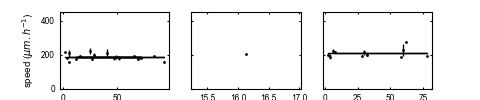

In [11]:
ncols = 3
fig,axs = gridplot(len(plates),ncols = ncols,subh = height,subw = width)
ax_list = list(axs)
maxi = 100
for j in range(len(plates)):
    plate_id = plates[j]
    plate = int(plate_id.split('_')[0])
    ax = ax_list[j]
    hull_speeds = []
    hull_time = []
    time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]

    data,dy,select_movements = get_average_time_data(int(plate_id),time_hypha_info,2)
    hyphae_hull = get_hyphae_hull(plate_id,analysis_folders)
    if len(hyphae_hull)>0:
        label = 'hull pusher'
        for t in range(1,min(len(time_hypha_plate['timestep'].unique())-1,maxi)):
            select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
            select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
            select = select.loc[select['speed'].between(150,350)]
            if len(select)>0:
                time = select['time_since_emergence'].iloc[0]
                if time<=100:
                    ax.scatter(select['time_since_emergence'].iloc[0],np.mean(select["speed"]),color='black')
                    ax.errorbar(select['time_since_emergence'].iloc[0],np.mean(select["speed"]),np.std(select["speed"])/np.sqrt(len(select)),color='black',label=label)
                    label = None
                    hull_speeds.append(np.mean(select["speed"]))
                    hull_time.append(select['time_since_emergence'].iloc[0])

        # ax.plot(data.index/pd.Timedelta(hours = 1),data)
        # ax.errorbar(data.index,data, yerr=dy,label='average')
        # ax.set_xlim(0,150)
        ax.set_ylim(0,450)

        # ax.legend()
        # ax.set_title(f'{plate}')
        # ax.set_xlabel('time since begin (h)')
        # ax.set_ylabel('speed ($\mu m.h^{-1}$)')
        if j//ncols == len(plates)//ncols-1:
            ax.set_xlabel('time since begin (h)')
        if j%ncols == 0:
            ax.set_ylabel('speed ($\mu m.h^{-1}$)') 
        if j%ncols !=0:
            ax.set_yticklabels([])
        ax.plot(hull_time,[np.mean(hull_speeds)]*len(hull_time),
                color="black",
                label= f'mean hull pusher speed {int(np.nanmean(hull_speeds))}$\pm${int(2*np.nanstd(hull_speeds)/np.sqrt(len(hull_speeds)))} $\mu m.h^{-1}$')
        # ax.legend()
    # break
# plt.savefig(f'Figure/FigureS2E.svg')    
plt.savefig(os.path.join(path_figure,'FigureS2E_agg.pdf'), transparent=True, bbox_inches='tight')


2023-05-09 17:15:26,561-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


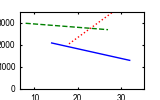

In [12]:
fig,ax = plt.subplots(figsize=(width,height))
# Define a list of line styles
line_styles = ['-', '--', ':', '-.', (0, (5, 1)), (0, (3, 1, 1, 1)), (0, (3, 5, 1, 5)), (0, (5, 5)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 10))]

# Define a list of line colors
line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'darkorange', 'purple', 'brown', 'teal', 'pink']

def statistic(ds,Cs):
    X = sm.add_constant(ds, prepend=False)
    model = sm.OLS(Cs,X)
    res = model.fit()
    a,b = res.params[0],res.params[1]
    color = plt.gca().lines[-1].get_color()
    ax.plot(ds,np.array(ds)*a+b,color = color, alpha = 0.01)
    return(a)

tot_ds = []
tot_Cs=[]
for j,plate in enumerate(plates):
    plate = int(plate.split('_')[0])
    Cs = Css[plate]
    ds = dssC[plate]
    tot_ds+=ds
    tot_Cs+=Cs
    # ax.plot(ds,Cs,alpha = 0.2,color = line_colors[j])
    
    X = sm.add_constant(ds, prepend=False)
    model = sm.OLS(Cs,X)
    res = model.fit()
    a,b = res.params[0],res.params[1]
    ax.plot(ds,np.array(ds)*a+b,label=plate,linestyle = line_styles[j],color = line_colors[j])
    data = np.array((ds,Cs))
    
#     n_resamples=1000
#     std = scipy.stats.bootstrap(data,statistic,
#                                 vectorized = False,
#                                 method="basic",
#                                 n_resamples = n_resamples,
#                                 paired= True).standard_error
# X = sm.add_constant(tot_ds, prepend=False)
# model = sm.OLS(tot_Cs,X)
# res = model.fit()
# a,b = res.params[0],res.params[1]
# ax.plot(tot_ds,np.array(tot_ds)*a+b,color = 'black')
df = pd.DataFrame((tot_ds,tot_Cs)).transpose()
df.columns = ('distance','saturation density')
data = np.array((tot_ds,tot_Cs))
# n_resamples=10000
# std = scipy.stats.bootstrap(data,statistic,
#                             vectorized = False,
#                             method="basic",
#                             n_resamples = n_resamples,
#                             paired= True).standard_error

# data = df.groupby('distance').mean()
# ax.plot(data.index,data,label="average",color='black',linewidth=10,alpha = 0.5)    
# ax.legend()
ax.set_xlabel('distance from origin (mm)')
ax.set_ylabel('saturation density \n ($\mu m.mm^{-2}$)')
# ax.set_ylim(0,1000)

# plt.tight_layout()
# plt.savefig(f'Figure/FigureS1Bsubset.svg')    
ax.set_ylim(0,3500)
plt.savefig(os.path.join(path_figure,'FigureS2D_agg.pdf'), transparent=True, bbox_inches='tight')


2023-05-09 17:15:28,036-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


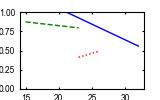

In [13]:
fig, ax = plt.subplots(figsize=(width,height))

for j,plate in enumerate(plates):
    plate = int(plate.split('_')[0])
    Cstips = np.array(Csstips[plate])
    if len(Cstips)>1:
        ds = dss[plate]
        # ax.scatter(ds,Cstips)
        x = np.array(ds)
        X = sm.add_constant(x, prepend=False)
        model = sm.OLS(Cstips,X)
        res = model.fit()
        a,b = res.params[0],res.params[1]
        ax.plot(x,x*a+b,linestyle = line_styles[j],color = line_colors[j])
# ax.set_ylim(0,1)
# fig, ax = plt.subplots()

# for plate in plates[6:]:
#     plate = int(plate.split('_')[0])
#     Cstips = Csstips[plate]
#     ax.plot(range(len(Cstips)),Cstips,alpha = 0.3)
#     # x = np.array(range(len(Cstips)))
#     # X = sm.add_constant(x, prepend=False)
#     # model = sm.OLS(Cstips,X)
#     # res = model.fit()
#     # a,b = res.params[0],res.params[1]
#     # ax.plot(x,x*a+b)
ax.set_ylim(0,1)
ax.set_xlabel('distance from origin (mm)')

ax.set_ylabel("peak value ($mm^{-2}$)")
plt.savefig(os.path.join(path_figure,'FigureS2F_agg.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots()
tot_ds = []
tot_Cs=[]
for plate in plate_select:
# for plate in [938]:
    t0s = t0ss[plate][:maxis[plate]]
    ds = dss[plate][:maxis[plate]]
    X = sm.add_constant(t0s, prepend=False)
    model = sm.OLS(ds,X)
    res = model.fit()
    a,b = res.params[0],res.params[1]
    x = np.array(t0s)+b/a
    ax.plot(x,np.array(t0s)*a+b,label = f"{plate} : speed = {int(1000*a)}$\mu m.h^{-1}$")
    ax.scatter(x,ds)
    
ax.legend()
ax.set_ylabel('distance from center (mm)')
ax.set_xlabel('time of wave crossing (hours)')
plt.tight_layout()
plt.savefig(f'Figure/FigureS1C2.svg')    

In [ ]:
strains = ["'A5'","'A5sp3'"]
plates = [plate for plate in folders['unique_id'].unique() if folders.loc[folders['unique_id']==plate].iloc[0]['strain'] in strains]
treatments = ["'001P100N100C'","'001P100N'"]
plates = [plate for plate in plates if folders.loc[folders['unique_id']==plate].iloc[0]['medium'] in treatments]
plates.remove(87720220419)
plates.remove(40320221005)
plates.remove(90720220321)

In [ ]:
# plt.close('all')
ncols = 3
fig,axs = gridplot(len(plates),ncols = ncols,subh = 4.0,subw = 8)
maxis = {plate :12 for plate in plates}
for i in range(len(plates)):
    plate=plates[i]
    ax = axs[i]
    Cs, lambs,ds,indexes, t0s,meancurve,meancurve2 = plot_single_plate(plate,time_plate_info,timestep[int(str(plate)[:-8])],ax,maxi =maxis[plate],unique_id = True)
    meancurves[plate]=meancurve
    meancurves2[plate]=meancurve2
    Css[plate] = Cs
    lambss[plate] = lambs
    dss[plate] = ds
    t0ss[plate] = t0s

In [ ]:
# plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()

for plate in plates:
    meancurve = meancurves[plate]
    meancurve2 = meancurves2[plate]
    ax.plot(meancurve.index,meancurve,label=int(str(plate)[:-8]))
    ax2.plot(meancurve.index,meancurve2,label=int(str(plate)[:-8]),linestyle="dashed")
ax.set_xlim((-30,30))
ax2.set_ylim((0,0.2))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()
tot_ds = []
tot_Cs=[]
# plates = [52,152,94,102,83,84,792,76]

for plate in plates:
    if int(str(plate)[:-8]) not in [91,89,56]:
        Cs = Css[plate]
        ds = dss[plate]
        tot_ds+=ds
        tot_Cs+=Cs
        ax.plot(ds,Cs,label = int(str(plate)[:-8]))
df = pd.DataFrame((tot_ds,tot_Cs)).transpose()
df.columns = ('distance','saturation density')
data = df.groupby('distance').mean()
ax.plot(data.index,data,label="average",color='black',linewidth=10,alpha = 0.5)    
ax.legend()
ax.set_xlabel('distance from origin (mm)')
ax.set_ylabel('saturation density ($\mu m.mm^{-1}$)')
plt.tight_layout()